<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Airborne_activity_through_resample_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/activity2003_2020.csv', parse_dates = ['Date'])
df.columns = ['Date', 'Conc']
df

,Date,Conc
0,2003-01-01,22.0
1,2003-01-02,18.0
2,2003-01-03,22.0
3,2003-01-04,46.0
4,2003-01-05,23.0
...,...,...
6482,2020-12-27,12.0
6483,2020-12-28,17.0
6484,2020-12-29,10.0
6485,2020-12-30,13.0


In [ ]:
df.describe()

,Conc
count,6404.000000
mean,17.198782
std,12.520943
min,1.000000
25%,9.000000
50%,14.000000
75%,22.000000
max,154.000000


In [ ]:
df = df.resample('W', on = 'Date').mean()
df

,Conc
Date,
2003-01-05,26.200000
2003-01-12,34.428571
2003-01-19,9.428571
2003-01-26,16.142857
2003-02-02,6.833333
...,...
2020-12-06,46.857143
2020-12-13,47.285714
2020-12-20,21.571429


In [ ]:
#OK result = df03.iloc[:, 1].div(df03.Conc.mean(), axis = 0)
df.reset_index(inplace = True)
df['Week'] = df.Date.dt.isocalendar().week
df['Year'] = df.Date.dt.year
df

,Date,Conc,Week,Year
0,2003-01-05,26.200000,1,2003
1,2003-01-12,34.428571,2,2003
2,2003-01-19,9.428571,3,2003
3,2003-01-26,16.142857,4,2003
4,2003-02-02,6.833333,5,2003
...,...,...,...,...
935,2020-12-06,46.857143,49,2020
936,2020-12-13,47.285714,50,2020
937,2020-12-20,21.571429,51,2020
938,2020-12-27,13.571429,52,2020


In [ ]:
df03 = df[df['Year'] == 2003]
df03

,Date,Conc,Week,Year
0,2003-01-05,26.200000,1,2003
1,2003-01-12,34.428571,2,2003
2,2003-01-19,9.428571,3,2003
3,2003-01-26,16.142857,4,2003
4,2003-02-02,6.833333,5,2003
5,2003-02-09,17.857143,6,2003
6,2003-02-16,15.428571,7,2003
7,2003-02-23,8.857143,8,2003
8,2003-03-02,10.666667,9,2003
9,2003-03-09,27.285714,10,2003


In [ ]:
#df_uni = df03.append(df04, sort = False)

In [ ]:
#write function for calculating w_i
def wi_calc(my_df, year):
    df_x = my_df[my_df['Year'] == year].dropna()
    result = df_x.iloc[:, 1].div(df_x.Conc.mean(), axis = 0)
    return result

df03['w_i'] = wi_calc(df, 2003)
df03

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Conc,Week,Year,w_i
0,2003-01-05,26.200000,1,2003,1.837894
1,2003-01-12,34.428571,2,2003,2.415117
2,2003-01-19,9.428571,3,2003,0.661401
3,2003-01-26,16.142857,4,2003,1.132399
4,2003-02-02,6.833333,5,2003,0.479349
5,2003-02-09,17.857143,6,2003,1.252654
6,2003-02-16,15.428571,7,2003,1.082293
7,2003-02-23,8.857143,8,2003,0.621316
8,2003-03-02,10.666667,9,2003,0.748252
9,2003-03-09,27.285714,10,2003,1.914055


In [ ]:
df04 = df[df['Year'] == 2004]

In [ ]:
df04['w_i'] = wi_calc(df, 2004)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df04.dropna()

,Date,Conc,Week,Year,w_i
52,2004-01-04,21.857143,1,2004,1.619357
53,2004-01-11,14.142857,2,2004,1.047819
54,2004-01-18,7.571429,3,2004,0.560954
55,2004-01-25,21.571429,4,2004,1.598188
56,2004-02-01,16.000000,5,2004,1.185411
57,2004-02-08,12.714286,6,2004,0.941979
58,2004-02-15,4.000000,7,2004,0.296353
59,2004-02-22,13.571429,8,2004,1.005483
60,2004-02-29,14.428571,9,2004,1.068987
61,2004-03-07,8.857143,10,2004,0.656210


In [ ]:
df05 = df[df['Year'] == 2005].dropna()

In [ ]:
df05['w_i'] = wi_calc(df, 2005)
df05

,Date,Conc,Week,Year,w_i
104,2005-01-02,3.142857,53,2005,0.237139
105,2005-01-09,4.142857,1,2005,0.312592
106,2005-01-16,7.571429,2,2005,0.571290
107,2005-01-23,5.000000,3,2005,0.377267
108,2005-01-30,21.428571,4,2005,1.616857
109,2005-02-06,13.000000,5,2005,0.980893
113,2005-03-06,9.333333,9,2005,0.704231
114,2005-03-13,7.285714,10,2005,0.549731
115,2005-03-20,8.000000,11,2005,0.603627
116,2005-03-27,10.428571,12,2005,0.786871


In [ ]:
df06 = df[df['Year'] == 2006].dropna()

In [ ]:
df06['w_i'] = wi_calc(df, 2006)
df06

,Date,Conc,Week,Year,w_i
156,2006-01-01,14.714286,52,2006,0.976944
157,2006-01-08,17.142857,1,2006,1.138187
158,2006-01-15,9.428571,2,2006,0.626003
159,2006-01-22,30.333333,3,2006,2.013959
160,2006-01-29,17.666667,4,2006,1.172965
161,2006-02-05,30.285714,5,2006,2.010797
162,2006-02-12,72.333333,6,2006,4.802517
163,2006-02-19,42.666667,7,2006,2.832821
164,2006-02-26,22.571429,8,2006,1.498613
165,2006-03-05,12.428571,9,2006,0.825186


In [ ]:
df07 = df[df['Year'] == 2007].dropna()
df07['w_i'] = wi_calc(df, 2007)
df07

,Date,Conc,Week,Year,w_i
209,2007-01-07,4.714286,1,2007,0.408701
210,2007-01-14,5.000000,2,2007,0.433471
211,2007-01-21,7.571429,3,2007,0.656399
212,2007-01-28,6.000000,4,2007,0.520165
213,2007-02-04,5.571429,5,2007,0.483010
214,2007-02-11,5.857143,6,2007,0.507780
215,2007-02-18,9.285714,7,2007,0.805017
216,2007-02-25,9.571429,8,2007,0.829787
217,2007-03-04,10.500000,9,2007,0.910289
218,2007-03-11,7.166667,10,2007,0.621308


In [ ]:
df08 = df[df['Year'] == 2008].dropna()
df08['w_i'] = wi_calc(df, 2008)
df08

,Date,Conc,Week,Year,w_i
261,2008-01-06,13.857143,1,2008,1.132211
262,2008-01-13,13.142857,2,2008,1.073850
263,2008-01-20,16.428571,3,2008,1.342312
264,2008-01-27,4.428571,4,2008,0.361841
265,2008-02-03,6.142857,5,2008,0.501908
266,2008-02-10,9.142857,6,2008,0.747026
267,2008-02-17,9.857143,7,2008,0.805387
268,2008-02-24,5.714286,8,2008,0.466891
269,2008-03-02,6.714286,9,2008,0.548597
270,2008-03-09,6.714286,10,2008,0.548597


In [ ]:
df09 = df[df['Year'] == 2009].dropna()
df09['w_i'] = wi_calc(df, 2009)
df09

,Date,Conc,Week,Year,w_i
313,2009-01-04,14.500000,1,2009,1.033483
314,2009-01-11,16.142857,2,2009,1.150578
315,2009-01-18,27.142857,3,2009,1.934600
316,2009-01-25,28.571429,4,2009,2.036421
317,2009-02-01,23.571429,5,2009,1.680047
318,2009-02-08,45.428571,6,2009,3.237909
319,2009-02-15,9.142857,7,2009,0.651655
320,2009-02-22,16.428571,8,2009,1.170942
321,2009-03-01,23.714286,9,2009,1.690229
322,2009-03-08,27.714286,10,2009,1.975328


In [ ]:
df10 = df[df['Year'] == 2010].dropna()
df10['w_i'] = wi_calc(df, 2010)
df10

,Date,Conc,Week,Year,w_i
365,2010-01-03,8.857143,53,2010,0.612443
366,2010-01-10,8.857143,1,2010,0.612443
367,2010-01-17,6.428571,2,2010,0.444515
368,2010-01-24,13.428571,3,2010,0.928542
369,2010-01-31,16.000000,4,2010,1.106348
370,2010-02-07,15.857143,5,2010,1.096470
371,2010-02-14,17.428571,6,2010,1.205129
372,2010-02-21,15.714286,7,2010,1.086592
373,2010-02-28,8.857143,8,2010,0.612443
374,2010-03-07,16.142857,9,2010,1.116226


In [ ]:
df11 = df[df['Year'] == 2011].dropna()
df11['w_i'] = wi_calc(df, 2011)
df11

,Date,Conc,Week,Year,w_i
417,2011-01-02,8.142857,52,2011,0.565812
418,2011-01-09,7.000000,1,2011,0.486400
419,2011-01-16,5.857143,2,2011,0.406988
420,2011-01-23,17.571429,3,2011,1.220963
421,2011-01-30,17.000000,4,2011,1.181257
422,2011-02-06,4.714286,5,2011,0.327575
423,2011-02-13,5.285714,6,2011,0.367282
424,2011-02-20,16.428571,7,2011,1.141551
425,2011-02-27,23.571429,8,2011,1.637877
426,2011-03-06,15.142857,9,2011,1.052212


In [ ]:
df12 = df[df['Year'] == 2012].dropna()
df12['w_i'] = wi_calc(df, 2012)
df12

,Date,Conc,Week,Year,w_i
469,2012-01-01,15.714286,52,2012,1.004999
470,2012-01-08,14.857143,1,2012,0.950181
471,2012-01-15,14.857143,2,2012,0.950181
472,2012-01-22,14.571429,3,2012,0.931908
473,2012-01-29,32.142857,4,2012,2.055680
474,2012-02-05,30.714286,5,2012,1.964316
475,2012-02-12,34.428571,6,2012,2.201862
476,2012-02-19,18.714286,7,2012,1.196863
477,2012-02-26,22.571429,8,2012,1.443544
478,2012-03-04,17.428571,9,2012,1.114635


In [ ]:
df13 = df[df['Year'] == 2013].dropna()
df13['w_i'] = wi_calc(df, 2013)
df13

,Date,Conc,Week,Year,w_i
522,2013-01-06,7.714286,1,2013,0.611831
523,2013-01-13,7.714286,2,2013,0.611831
524,2013-01-20,12.571429,3,2013,0.997059
525,2013-01-27,14.571429,4,2013,1.155681
526,2013-02-03,8.000000,5,2013,0.634492
527,2013-02-10,6.142857,6,2013,0.487199
528,2013-02-17,24.714286,7,2013,1.960126
529,2013-02-24,21.571429,8,2013,1.710862
530,2013-03-03,12.571429,9,2013,0.997059
531,2013-03-10,10.571429,10,2013,0.838436


In [ ]:
df14 = df[df['Year'] == 2014].dropna()
df14['w_i'] = wi_calc(df, 2014)
df14

,Date,Conc,Week,Year,w_i
574,2014-01-05,17.714286,1,2014,0.649280
575,2014-01-12,7.428571,2,2014,0.272279
576,2014-01-19,17.714286,3,2014,0.649280
577,2014-01-26,16.571429,4,2014,0.607391
578,2014-02-02,18.428571,5,2014,0.675461
579,2014-02-09,22.571429,6,2014,0.827308
580,2014-02-16,10.571429,7,2014,0.387474
581,2014-02-23,12.142857,8,2014,0.445071
582,2014-03-02,33.857143,9,2014,1.240963
583,2014-03-09,48.142857,10,2014,1.764576


In [ ]:
df15 = df[df['Year'] == 2015].dropna()
df15['w_i'] = wi_calc(df, 2015)
df15

,Date,Conc,Week,Year,w_i
626,2015-01-04,11.428571,1,2015,0.517220
627,2015-01-11,19.571429,2,2015,0.885739
628,2015-01-18,14.714286,3,2015,0.665921
629,2015-01-25,19.285714,4,2015,0.872809
630,2015-02-01,27.857143,5,2015,1.260724
631,2015-02-08,13.285714,6,2015,0.601268
632,2015-02-15,7.857143,7,2015,0.355589
633,2015-02-22,16.857143,8,2015,0.762899
634,2015-03-01,26.142857,9,2015,1.183141
635,2015-03-08,13.857143,10,2015,0.627129


In [ ]:
df16 = df[df['Year'] == 2016].dropna()
df16['w_i'] = wi_calc(df, 2016)
df16

,Date,Conc,Week,Year,w_i
678,2016-01-03,30.142857,53,2016,1.423253
679,2016-01-10,46.142857,1,2016,2.178724
680,2016-01-17,7.571429,2,2016,0.357500
681,2016-01-24,11.000000,3,2016,0.519386
682,2016-01-31,7.500000,4,2016,0.354127
683,2016-02-07,7.428571,5,2016,0.350754
684,2016-02-14,14.714286,6,2016,0.694763
685,2016-02-21,16.571429,7,2016,0.782452
686,2016-02-28,9.571429,8,2016,0.451933
687,2016-03-06,12.428571,9,2016,0.586839


In [ ]:
df17 = df[df['Year'] == 2017].dropna()
df17['w_i'] = wi_calc(df, 2017)
df17

,Date,Conc,Week,Year,w_i
730,2017-01-01,9.142857,52,2017,0.462693
731,2017-01-08,24.857143,1,2017,1.257946
732,2017-01-15,21.285714,2,2017,1.077206
733,2017-01-22,10.714286,3,2017,0.542218
734,2017-01-29,16.000000,4,2017,0.809712
735,2017-02-05,37.285714,5,2017,1.886919
736,2017-02-12,24.428571,6,2017,1.236257
737,2017-02-19,11.857143,7,2017,0.600055
738,2017-02-26,11.000000,8,2017,0.556677
739,2017-03-05,15.000000,9,2017,0.759105


In [ ]:
df18 = df[df['Year'] == 2018].dropna()
df18['w_i'] = wi_calc(df, 2018)
df18

,Date,Conc,Week,Year,w_i
783,2018-01-07,14.142857,1,2018,0.469437
784,2018-01-14,22.428571,2,2018,0.744460
785,2018-01-21,32.142857,3,2018,1.066902
786,2018-01-28,47.000000,4,2018,1.560047
787,2018-02-04,19.142857,5,2018,0.635399
788,2018-02-11,48.571429,6,2018,1.612207
789,2018-02-18,84.500000,7,2018,2.804766
790,2018-02-25,32.285714,8,2018,1.071644
791,2018-03-04,45.000000,9,2018,1.493662
792,2018-03-11,40.142857,10,2018,1.332442


In [ ]:
df19 = df[df['Year'] == 2019].dropna()
df19['w_i'] = wi_calc(df, 2019)
df19

,Date,Conc,Week,Year,w_i
835,2019-01-06,13.666667,1,2019,0.725470
836,2019-01-13,33.571429,2,2019,1.782077
837,2019-01-20,11.428571,3,2019,0.606665
838,2019-01-27,22.000000,4,2019,1.167829
839,2019-02-03,20.857143,5,2019,1.107163
840,2019-02-10,13.285714,6,2019,0.705248
841,2019-02-17,13.857143,7,2019,0.735581
842,2019-02-24,15.142857,8,2019,0.803831
843,2019-03-03,14.428571,9,2019,0.765914
844,2019-03-10,12.857143,10,2019,0.682498


In [ ]:
df20 = df[df['Year'] == 2020].dropna()
df20['w_i'] = wi_calc(df, 2020)
df20

,Date,Conc,Week,Year,w_i
887,2020-01-05,13.714286,1,2020,0.728157
888,2020-01-12,10.714286,2,2020,0.568872
889,2020-01-19,15.714286,3,2020,0.834346
890,2020-01-26,9.714286,4,2020,0.515778
891,2020-02-02,17.714286,5,2020,0.940536
892,2020-02-09,15.714286,6,2020,0.834346
893,2020-02-16,11.714286,7,2020,0.621967
894,2020-02-23,12.857143,8,2020,0.682647
895,2020-03-01,12.857143,9,2020,0.682647
896,2020-03-08,19.285714,10,2020,1.023970


In [ ]:
df_uni = df03.append(df04, sort = False)
df_uni

,Date,Conc,Week,Year,w_i
0,2003-01-05,26.200000,1,2003,1.837894
1,2003-01-12,34.428571,2,2003,2.415117
2,2003-01-19,9.428571,3,2003,0.661401
3,2003-01-26,16.142857,4,2003,1.132399
4,2003-02-02,6.833333,5,2003,0.479349
...,...,...,...,...,...
99,2004-11-28,8.714286,48,2004,0.645626
100,2004-12-05,10.285714,49,2004,0.762050
101,2004-12-12,4.142857,50,2004,0.306937
102,2004-12-19,5.428571,51,2004,0.402193


In [ ]:
df_uni1 = df_uni.append(df05, sort = False)
df_uni2 = df_uni1.append(df06, sort = False)
df_uni3 = df_uni2.append(df07, sort = False)
df_uni4 = df_uni3.append(df08, sort = False)
df_uni5 = df_uni4.append(df09, sort = False)
df_uni6 = df_uni5.append(df10, sort = False)
df_uni7 = df_uni6.append(df11, sort = False)
df_uni8 = df_uni7.append(df12, sort = False)
df_uni9 = df_uni8.append(df13, sort = False)
df_uni10 = df_uni9.append(df14, sort = False)
df_uni11 = df_uni10.append(df15, sort = False)
df_uni12 = df_uni11.append(df16, sort = False)
df_uni13 = df_uni12.append(df17, sort = False)
df_uni14 = df_uni13.append(df18, sort = False)
df_uni15 = df_uni14.append(df19, sort = False)
df_uni16 = df_uni15.append(df20, sort = False)
df_uni16

,Date,Conc,Week,Year,w_i
0,2003-01-05,26.200000,1,2003,1.837894
1,2003-01-12,34.428571,2,2003,2.415117
2,2003-01-19,9.428571,3,2003,0.661401
3,2003-01-26,16.142857,4,2003,1.132399
4,2003-02-02,6.833333,5,2003,0.479349
...,...,...,...,...,...
934,2020-11-29,16.000000,48,2020,0.849516
935,2020-12-06,46.857143,49,2020,2.487869
936,2020-12-13,47.285714,50,2020,2.510624
937,2020-12-20,21.571429,51,2020,1.145330


In [ ]:
df_final=df_uni16.drop(columns = ['Week', 'Year'])
df_final

,Date,Conc,w_i
0,2003-01-05,26.200000,1.837894
1,2003-01-12,34.428571,2.415117
2,2003-01-19,9.428571,0.661401
3,2003-01-26,16.142857,1.132399
4,2003-02-02,6.833333,0.479349
...,...,...,...
934,2020-11-29,16.000000,0.849516
935,2020-12-06,46.857143,2.487869
936,2020-12-13,47.285714,2.510624
937,2020-12-20,21.571429,1.145330


,Conc,w_i
Date,,
2003-12-21,12.571429,0.881868
2003-12-28,14.000000,0.982081
2004-01-04,21.857143,1.619357
2004-01-11,14.142857,1.047819
2004-01-18,7.571429,0.560954
2004-01-25,21.571429,1.598188
2004-02-01,16.000000,1.185411
2004-02-08,12.714286,0.941979
2004-02-15,4.000000,0.296353


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index03-20.csv', index = False)

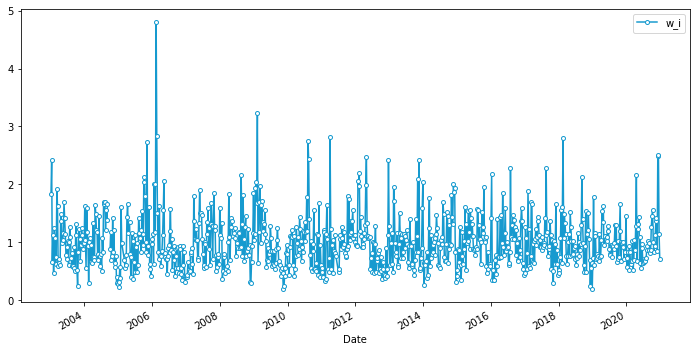

In [ ]:
df_final.plot('Date',
              'w_i',
              figsize=(12,6),
              marker = 'o',
              markersize = 4,
              mfc = 'white',        
              color = '#169acf')

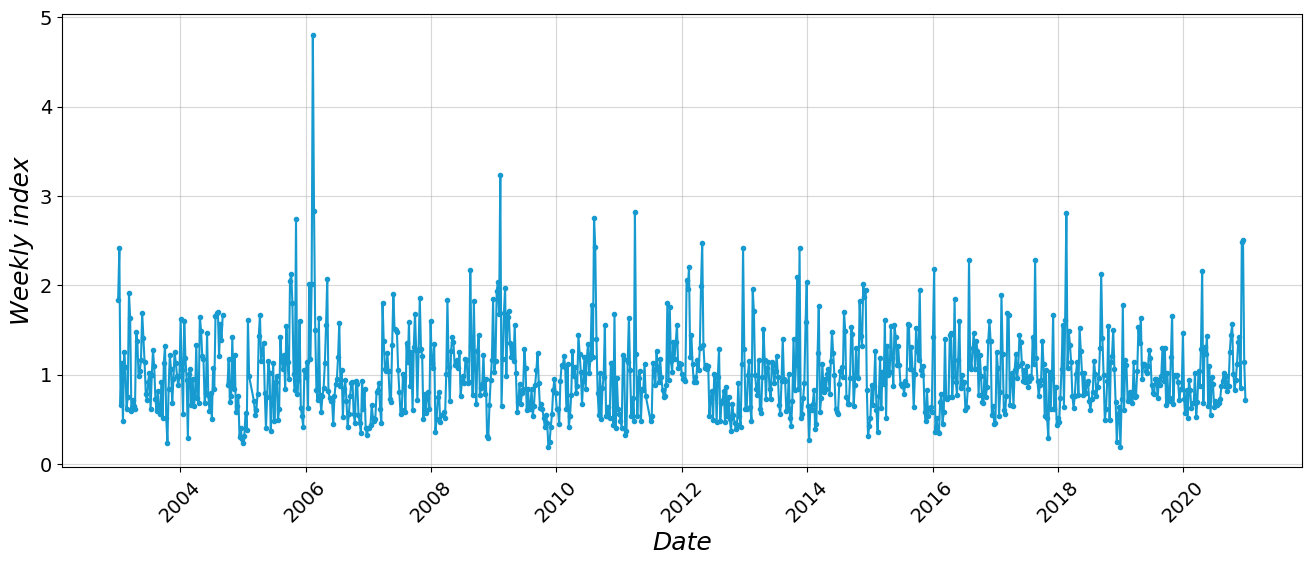

<Figure size 432x288 with 0 Axes>

In [ ]:
x = df_final['Date']
y = df_final['w_i']
dates = df_final.Date.dt.year

fig = plt.figure(figsize = (16, 6), dpi = 100)
ax = fig.add_axes()
plt.plot(x, y, marker = 'o',
         markersize = 3,
         #label = 'Weekly index',
         color = '#169acf')
plt.xlabel('Date', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.ylabel('Weekly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)
#plt.legend(loc = 'upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig6.png',dpi = 300)

# **Holt-Winters model**

In [ ]:
df_final.set_index('Date', inplace=True)
df_final.head()

#decompose_result = 

,Conc,w_i
Date,,
2003-01-05,26.200000,1.837894
2003-01-12,34.428571,2.415117
2003-01-19,9.428571,0.661401
2003-01-26,16.142857,1.132399
2003-02-02,6.833333,0.479349


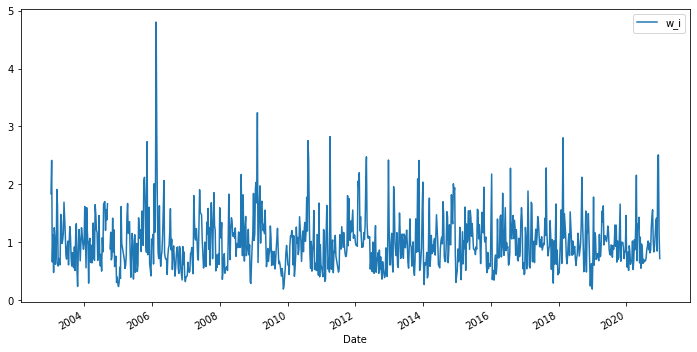

In [ ]:
df_final[['w_i']].plot(figsize = (12,6))

In [ ]:
decompose_result = seasonal_decompose(df_final['w_i'], model='multiplicative')
decompose_result.plot()

ValueError: ignored